In [1]:
import os.path as osp
import janitor
import pypbo.perf as perf

In [2]:
data = osp.expanduser('~/data/etf.h5')
px = pd.read_hdf(data, key='close')

In [3]:
px.tail()

,IEML LN Equity,IHYU LN Equity,HYG US Equity,EEM US Equity,SPY US Equity,VOO US Equity,VMID LN Equity,VUTA LN Equity,EMB US Equity,LQD US Equity,IEF US Equity,IEI US Equity,SHY US Equity,IHYG LN Equity
index,,,,,,,,,,,,,,
2019-07-15,60.93,103.13,86.99,43.01,300.75,276.18,30.8800,20.7750,113.23,123.28,109.28,125.17,84.54,105.37
2019-07-16,60.83,102.88,86.81,42.95,299.71,275.28,30.9600,20.9175,113.17,123.02,109.04,124.98,84.51,105.31
2019-07-17,60.83,102.73,86.70,42.82,297.74,273.42,30.8725,20.9400,113.30,123.67,109.55,125.33,84.59,105.10
2019-07-18,61.03,102.51,86.74,43.08,298.83,274.42,30.7750,20.8700,113.51,123.96,109.82,125.62,84.69,104.82
2019-07-19,61.26,102.64,86.59,42.86,297.17,272.95,30.9100,20.8725,113.34,123.77,109.62,125.39,84.60,105.00


In [4]:
rtns = perf.log_returns(px)

In [5]:
rtns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4967 entries, 2000-01-03 to 2019-07-19
Data columns (total 14 columns):
IEML LN Equity    2043 non-null float64
IHYU LN Equity    1983 non-null float64
HYG US Equity     3090 non-null float64
EEM US Equity     4095 non-null float64
SPY US Equity     4916 non-null float64
VOO US Equity     2229 non-null float64
VMID LN Equity    1213 non-null float64
VUTA LN Equity    102 non-null float64
EMB US Equity     2913 non-null float64
LQD US Equity     4274 non-null float64
IEF US Equity     4274 non-null float64
IEI US Equity     3151 non-null float64
SHY US Equity     4274 non-null float64
IHYG LN Equity    2241 non-null float64
dtypes: float64(14)
memory usage: 582.1 KB


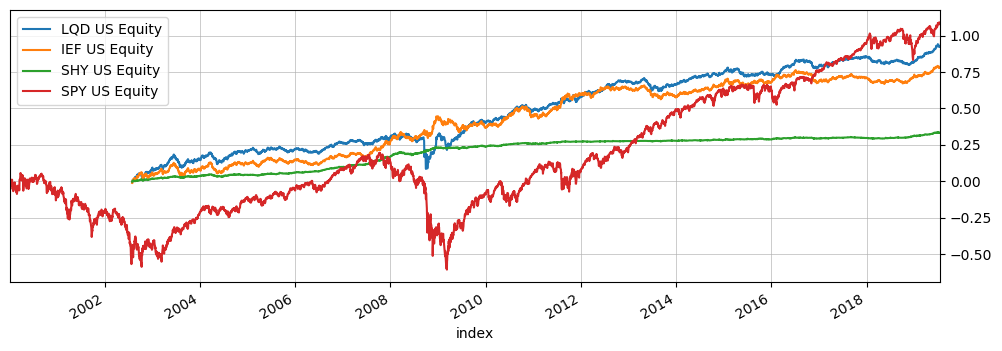

In [6]:
rtns[['LQD US Equity', 'IEF US Equity', 'SHY US Equity', 'SPY US Equity']].cumsum().plot()

In [7]:
# import sys
# sys.path.insert(0, '/Users/zwl/git/mlstack')

In [8]:
import mlstack.tscv as tscv

In [9]:
dfl = tscv.wide_to_long(rtns)

In [10]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40798 entries, 0 to 40797
Data columns (total 3 columns):
index    40798 non-null datetime64[ns]
name     40798 non-null object
value    40798 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [11]:
dfl.head()

,index,name,value
0,2003-04-14,EEM US Equity,0.012997
1,2003-04-15,EEM US Equity,0.011777
2,2003-04-16,EEM US Equity,0.011524
3,2003-04-17,EEM US Equity,0.007150
4,2003-04-21,EEM US Equity,-0.000460


In [12]:
feat_cols = ['LQD US Equity', 'IEF US Equity', 'EEM US Equity', 'SPY US Equity']

In [48]:
x = rtns[feat_cols].dropna(how='all')

In [49]:
flag = x.isnull().any(axis=1)

In [50]:
x.loc[flag].tail()

,LQD US Equity,IEF US Equity,EEM US Equity,SPY US Equity
index,,,,
2003-04-07,-0.001829,-0.002340,NaN,-0.001930
2003-04-08,0.003654,0.003743,NaN,0.001590
2003-04-09,0.003277,0.003380,NaN,-0.013242
2003-04-10,-0.003642,-0.002680,NaN,0.005500
2003-04-11,-0.003563,-0.002570,NaN,-0.004121


In [51]:
# safe to drop other NaN
x = x.dropna(how='any')

In [52]:
x = janitor.clean_names(x)

In [53]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4095 entries, 2003-04-14 to 2019-07-19
Data columns (total 4 columns):
lqd_us_equity    4095 non-null float64
ief_us_equity    4095 non-null float64
eem_us_equity    4095 non-null float64
spy_us_equity    4095 non-null float64
dtypes: float64(4)
memory usage: 160.0 KB


In [54]:
# now convert to sequence examples (t, dim)
seq_len = 12
dim = x.shape[1]

In [55]:
num_train = len(x) // seq_len
tail = len(x) % seq_len

In [56]:
num_train, tail

(341, 3)

In [57]:
# remove tail
if tail > 0:
    x = x.iloc[:-tail]
len(x)

4092

In [58]:
xx = x.values.reshape((-1, seq_len, dim))

In [59]:
xx.shape

(341, 12, 4)

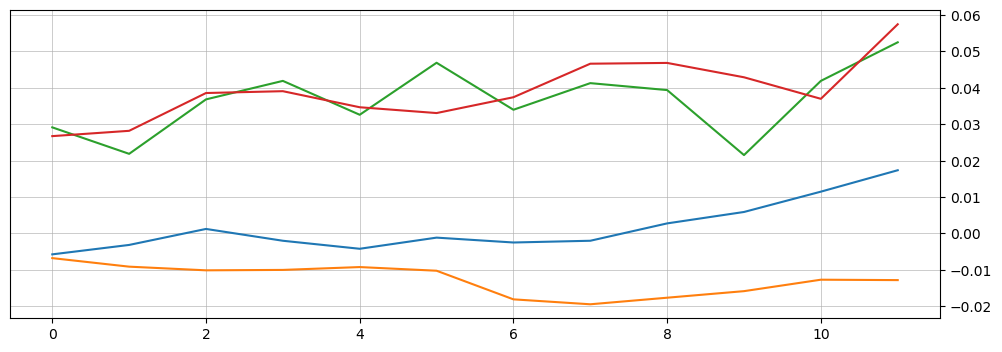

In [60]:
# long at random slice
plt.plot(range(12), xx[105].cumsum(axis=0))

In [26]:
import torch
import torch.nn as nn

In [27]:
import sys
sys.path.insert(0, osp.expanduser('~/git/former/'))

In [28]:
# from former.transformers import CTransformer

In [29]:
from former.transformers import TSTransformer

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [31]:
b, t, e = xx.shape

In [61]:
former = TSTransformer(feature_dim=e, heads=4, depth=3, seq_length=t, 
                       num_classes=3)

In [62]:
former = former.to(device)

In [63]:
xa = torch.from_numpy(xx).to(device).float()

In [93]:
xa.shape

torch.Size([341, 12, 4])

In [64]:
xa.dtype

torch.float32

In [65]:
y = former.forward(xa)

In [66]:
y.shape

torch.Size([341, 3])

In [67]:
y

tensor([[-1.2405, -1.9530, -0.5640],
        [-1.2385, -1.9670, -0.5616],
        [-1.2394, -1.9555, -0.5640],
        ...,
        [-1.2394, -1.9647, -0.5617],
        [-1.2385, -1.9619, -0.5628],
        [-1.2390, -1.9636, -0.5621]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward>)

## Next Steps

- learn `torch.utils.data.Dataset` and implement a `Dataset` object that feeds financial time series data.
    - [blog](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel)
    - [docs](https://pytorch.org/docs/stable/data.html)
- Use `pytorch_lightning` to build a quick script to predict asset returns.


### Split data into features and labels

In [41]:
from mlstack import data_processing as dp

In [40]:
from mlstack.tscv import TimeSeriesEmbargoSplit

In [69]:
xa.shape

torch.Size([341, 12, 4])

In [70]:
# need to swap axies 
xb = torch.transpose(xa, 1, 2)
xb.shape

torch.Size([341, 4, 12])

In [72]:
x.shape

(4092, 4)

In [77]:
x.T.shape

(4, 4092)

In [80]:
fx, fy = dp.sequential_xy_split_2d(x.T.values, train_len=7, target_len=3, ban_len=2)

In [81]:
fx.shape, fy.shape

((341, 4, 7), (341, 4, 3))

In [88]:
# validate data is correct
np.allclose(pd.DataFrame(fx[0].T), x.head(7))

True

In [89]:
np.allclose(pd.DataFrame(fy[0].T), x.iloc[7:10])

True

In [91]:
# validate ban is implemented correctly
np.allclose(pd.DataFrame(fx[1].T), x.iloc[12:19])

True

### build financial dataset

In [94]:
from torch.utils.data import Dataset

In [100]:
class TSDataset2D(Dataset):
    def __init__(self, data, seq_len: int, pred_len: int, ban_len: int):
        # data.shape == D, N
        assert data.ndim == 2
        self.data = data
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.ban_len = ban_len
        self.x, self.y = dp.sequential_xy_split_2d(data, train_len=seq_len, 
                                                   target_len=pred_len, 
                                                   ban_len=ban_len)
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        _, D, N = self.x.shape
        x = self.x[idx]
        y = self.y[idx]
        return x, y

In [101]:
d = TSDataset2D(x.T.values, 7, 3, 2)

In [106]:
d[0]

(array([[ 0.00054905,  0.00182787,  0.00673472, -0.00208832,  0.00208832,
          0.00045338,  0.00578554],
        [-0.00280899,  0.00351188,  0.0022182 , -0.00128491, -0.00186934,
          0.00023315, -0.00046636],
        [ 0.01299726,  0.01177731,  0.01152449,  0.0071503 , -0.00045977,
          0.00344313,  0.00468653],
        [ 0.02044281,  0.00928832, -0.01718916,  0.01473528,  0.00100444,
          0.01867611,  0.0091542 ]]),
 array([[ 5.84190706e-03,  8.96401113e-05,  5.37491005e-04],
        [ 5.83265908e-03,  1.62744000e-03, -1.04604083e-03],
        [-1.99257960e-02, -1.67755708e-02,  1.64265104e-02],
        [-8.93509094e-03, -1.24458836e-02,  1.71414957e-02]]))

In [107]:
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from torch.nn import functional as F

In [ ]:
class FinNet(pl.LightningModule):
    def __init__(self, dim, seq_len, heads: int, n_layers: int):
        super().__init__()
        self.n_layers = n_layers
        self.tsformer = TSTransformer(feature_dim=dim, heads=heads, 
                                      depth=n_layers, 
                                      seq_length=seq_len)
        
    def forward(self, x):
        return self.tsformer(x)
    
    
    # TODO: how to use Transformer for regression problems. 
    # or convert y into a classification problem.